(structural_regression-models-notebook)=
# Modelli di Regressione Strutturale

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semPlot")
    library("knitr")
    library("markdown")
    library("patchwork")
    library("lme4")
    library("here")
})

set.seed(42)

Un comune modello nell'analisi delle equazioni strutturali (SEM) è il modello di regressione strutturale (Sr), noto anche come modello di percorso con variabili latenti o modello LISREL completo. La parte "strutturale" di un modello Sr rappresenta ipotesi sugli effetti diretti o indiretti tra variabili osservate o fattori comuni, mentre la parte di "misurazione" rappresenta la corrispondenza tra i fattori comuni e i loro indicatori.

La specificazione di modelli Sr con indicatori continui e i requisiti per la loro identificazione saranno considerati per primi in questo capitolo. Successivamente, vengono delineate due diverse strategie per analizzare i modelli Sr completi in cui ogni variabile nel modello strutturale è un fattore comune e ciascuno ha molteplici indicatori. Queste strategie affrontano il problema di come identificare la fonte o le fonti di errore di specificazione, separando la valutazione della parte di misurazione del modello dall'analisi della sua parte strutturale. 

Inoltre, in questo capitolo vengono discussi anche i modelli Sr parziali con indicatori singoli per alcune, ma non tutte, le variabili nella parte strutturale del modello. Viene inoltre spiegato un metodo per specificare il modello che controlla esplicitamente la misurazione negli indicatori singoli senza influenzare l'adattamento del modello. 

Nella {numref}`kline-15-1-fig` (a), è rappresentato un modello di percorso con variabili manifeste. Viene assunto che la variabile esogena X1 sia misurata senza errore, sebbene questa assunzione sia spesso violata nella pratica. Le variabili endogene nel modello, come Y1 e Y4, possono avere errori casuali che si manifestano nelle loro perturbazioni.

```{figure} ../images/kline_15_1.png
---
height: 500px
name: kline-15-1-fig
---
Esempi di un modello di percorso con variabili manifeste (a) e di un corrispondente modello di regressione strutturale completo con indicatori multipli per ogni fattore comune nella parte strutturale (b). (Figura tratta da {cite:t}`kline2023principles`)
```

La Figura {numref}`kline-15-1-fig` (b) illustra un modello di Regressione Strutturale (SR) completo, che integra sia componenti strutturali sia di misurazione. In questo modello SR, a differenza del modello di percorso, ciascun indicatore (X1, Y1, Y4) è definito come uno tra numerosi indicatori associati a un fattore comune. Di conseguenza, tutte le variabili osservabili in questa figura includono termini di errore.

Nella parte strutturale del modello, presentata nella Figura {numref}`kline-15-1-fig` (b), si osserva la rappresentazione degli stessi schemi di effetti causali diretti e indiretti trovati nel modello di percorso (mostrato nella Figura {numref}`kline-15-1-fig` (a)), ma applicati ai fattori comuni. Tale modello strutturale è di tipo ricorsivo, sebbene sia anche fattibile la progettazione di un modello SR con componenti strutturali non ricorsive. In questa figura, ogni fattore endogeno possiede una perturbazione specifica ($D_B$, $D_C$), che, a differenza dei modelli di percorso con variabili manifeste, riflettono unicamente cause non considerate e non errori di misurazione degli indicatori del fattore.

Per quanto riguarda l'analisi delle medie, le osservazioni e i parametri nei modelli SR sono trattati allo stesso modo di quelli nei modelli di percorso e nei modelli di Analisi Fattoriale Confermativa (CFA), conformemente alle regole precedentemente stabilite. L'identificazione di un modello SR completo avviene quando sia la sua componente di misurazione, riformulata come un modello CFA, sia la parte strutturale risultano identificate. La regola di identificazione in due fasi implica che, per determinare se un modello SR completo sia identificato, è necessario esaminare separatamente ciascuna delle sue parti, ovvero quelle di misurazione e strutturale.

## Modellazione in Due Fasi

Immaginiamo che un ricercatore abbia definito un modello di Regressione Strutturale (SR) completo, come mostrato nella {numref}`kline-15-2-fig`(a). Dopo aver raccolto i dati, il ricercatore adotta un approccio monofase per analizzare il modello, eseguendo una stima simultanea delle componenti di misurazione e strutturali. Tuttavia, i risultati rivelano che il modello non si adatta bene ai dati. Ciò solleva interrogativi sulla localizzazione del problema: è nella parte di misurazione, nella parte strutturale, o in entrambe? Identificare la fonte del problema con precisione può essere complesso usando un approccio monofase.

```{figure} ../images/kline_15_2.png
---
height: 600px
name: kline-15-2-fig
---
Valutazione della regola in due fasi per l'identificazione di un modello di regressione strutturale completo presentato con simbolismo grafico compatto per i termini di errore degli indicatori nella parte di misurazione e le perturbazioni nella parte strutturale. (Figura tratta da {cite:t}`kline2023principles`)
```

Per affrontare questa sfida, la modellazione bifase, suggerita da Anderson e Gerbing (1988), propone un'euristica in due fasi per l'identificazione dei modelli SR completi:

1. **Primo Passaggio**: Il modello SR originale viene trasformato in un modello di misurazione CFA. Questo modello riformulato viene quindi analizzato per valutare l'adattamento ai dati. Un cattivo adattamento del modello CFA potrebbe indicare errori nelle ipotesi di misurazione del ricercatore e suggerire che l'adattamento del modello SR originale potrebbe essere compromesso, specialmente se la sua parte strutturale è sovraidentificata.

2. **Secondo Passaggio**: Con un modello di misurazione CFA ritenuto valido dal primo passaggio, il secondo confronta l'adattamento del modello SR originale con quello di diversi modelli strutturali alternativi, utilizzando il test di differenza del chi-quadro.

La modellazione bifase presenta diversi problemi. Primo, richiede di considerare tutte le opzioni possibili di riformulazione sia del modello CFA che del modello strutturale. Secondo, il processo può essere paragonato a un "giardino dei sentieri che si biforcano", dove ogni decisione può portare a diverse possibili modifiche del modello originale. Terzo, esiste il rischio di capitalizzare sulle variazioni casuali quando si testano e si riformulano modelli correlati usando gli stessi dati.

Un'altra sfida è rappresentata dai modelli equivalenti. Ad esempio, un modello CFA al Primo Passaggio e un modello SR corrispondente con una parte strutturale appena identificata al Secondo Passaggio potrebbero risultare equivalenti. La preferenza per il modello SR dovrebbe quindi basarsi su ragionamenti logici o essere supportata dal design dello studio.

Se un modello di misurazione viene mantenuto al Primo Passaggio, esistono due approcci principali per testare il modello strutturale nel Secondo Passaggio: il Model building (ricerca in avanti) e il Model trimming (ricerca all'indietro). Chou e Bentler (2002) hanno osservato che la probabilità di identificare il modello SR corretto dipende significativamente dal modello inizialmente specificato. Inoltre, hanno trovato che il modello corretto veniva identificato circa il 60% delle volte nel Model trimming.

È importante notare che se i carichi fattoriali variano notevolmente con diversi modelli strutturali, ciò indica che il modello di misurazione non è invariante e aumenta il rischio di confondimento interpretativo.

Infine, alcuni studi hanno mostrato che le statistiche globali di adattamento standard possono essere più influenzate dalla componente di misurazione dei modelli SR rispetto alla parte strutturale. Tuttavia, i risultati delle simulazioni al computer indicano che non esiste un insieme universale di soglie per gli indici di adattamento approssimato che siano validi per tutti i tipi di modelli e dati.

## Una Applicazione Concreta

La {numref}`kline-15-3-fig` illustra un modello SR (Regressione Strutturale) iniziale che esplora il rendimento scolastico e l'adattamento in aula di studenti di età media corrispondente ai gradi 7-8. Il modello considera l'influenza dell'abilità cognitiva generale e del livello di rischio di disturbi psicopatologici. Uno degli indicatori di rischio deriva dalla diagnosi di disturbi psichiatrici maggiori nei genitori, mentre il secondo è basato sul livello socio-economico (SES) della famiglia, con punteggi più alti che indicano un SES inferiore. Le abilità cognitive sono valutate tramite i punteggi in ragionamento verbale, analisi visivo-spaziale e memoria, ottenuti da un test di QI somministrato individualmente.

```{figure} ../images/kline_15_3.png
---
height: 600px
name: kline-15-3-fig
---
Modello iniziale completo di regressione strutturale del rendimento scolastico e dell'adattamento in classe come funzione dell'abilità cognitiva e del rischio di psicopatologia. (Figura tratta da {cite:t}`kline2023principles`)
```

Il modello comprende due fattori endogeni: il rendimento scolastico, valutato attraverso test standardizzati di lettura, aritmetica e ortografia, e l'adattamento in classe, misurato con tre indicatori forniti dagli insegnanti riguardo alla motivazione, stabilità emotiva e qualità delle relazioni sociali degli studenti. In questo modello strutturale, sia il rendimento scolastico sia l'adattamento in classe sono influenzati dall'abilità cognitiva e dal rischio, ma non vi è un effetto diretto o una covarianza delle perturbazioni tra questi due fattori endogeni, indicando che eventuali associazioni tra di essi sono attribuibili alle loro cause comuni, i fattori esogeni.

In [2]:
# input the correlations in lower diagnonal form
worlandLower.cor <- "
1.00
 .70 1.00
 .65  .60 1.00
 .55  .50  .45 1.00
 .50  .45  .40  .70 1.00
 .35  .35  .30  .55  .50 1.00
 .30  .30  .30  .50  .45  .44 1.00
 .25  .20  .22  .41  .28  .34  .40 1.00
 .35  .32  .32  .48  .45  .42  .60  .45 1.00
-.25 -.24 -.22 -.21 -.18 -.15 -.15 -.12 -.17 1.00
-.22 -.26 -.30 -.25 -.22 -.18 -.17 -.14 -.20  .42 1.00 "

# name the variables and convert to full correlation matrix
worland.cor <- lavaan::getCov(worlandLower.cor, names = c(
    "verbal", "visual",
    "memory", "read", "math", "spell", "motive", "harmony", "stable", "parent", "ses"
))

# add the standard deviations and convert to covariances
worland.cov <- lavaan::cor2cov(worland.cor,
    sds = c(
        13.75, 14.80, 12.60, 14.90, 15.25, 13.85, 9.50, 11.10, 8.70,
        12.00, 8.50
    )
)

**Primo Passaggio nella modellazione in due fasi per un modello SR completo di rendimento scolastico e adattamento in classe**

In [3]:
# 4-factor CFA
worlandCFA.model <- "
    Cognitive =~ verbal + visual + memory
    Achieve =~ read + math + spell
    Adjust =~ motive + harmony + stable
    Risk =~ parent + ses 
 "

In [4]:
worlandCFA <- lavaan::cfa(worlandCFA.model,
    sample.cov = worland.cov,
    sample.nobs = 158
)

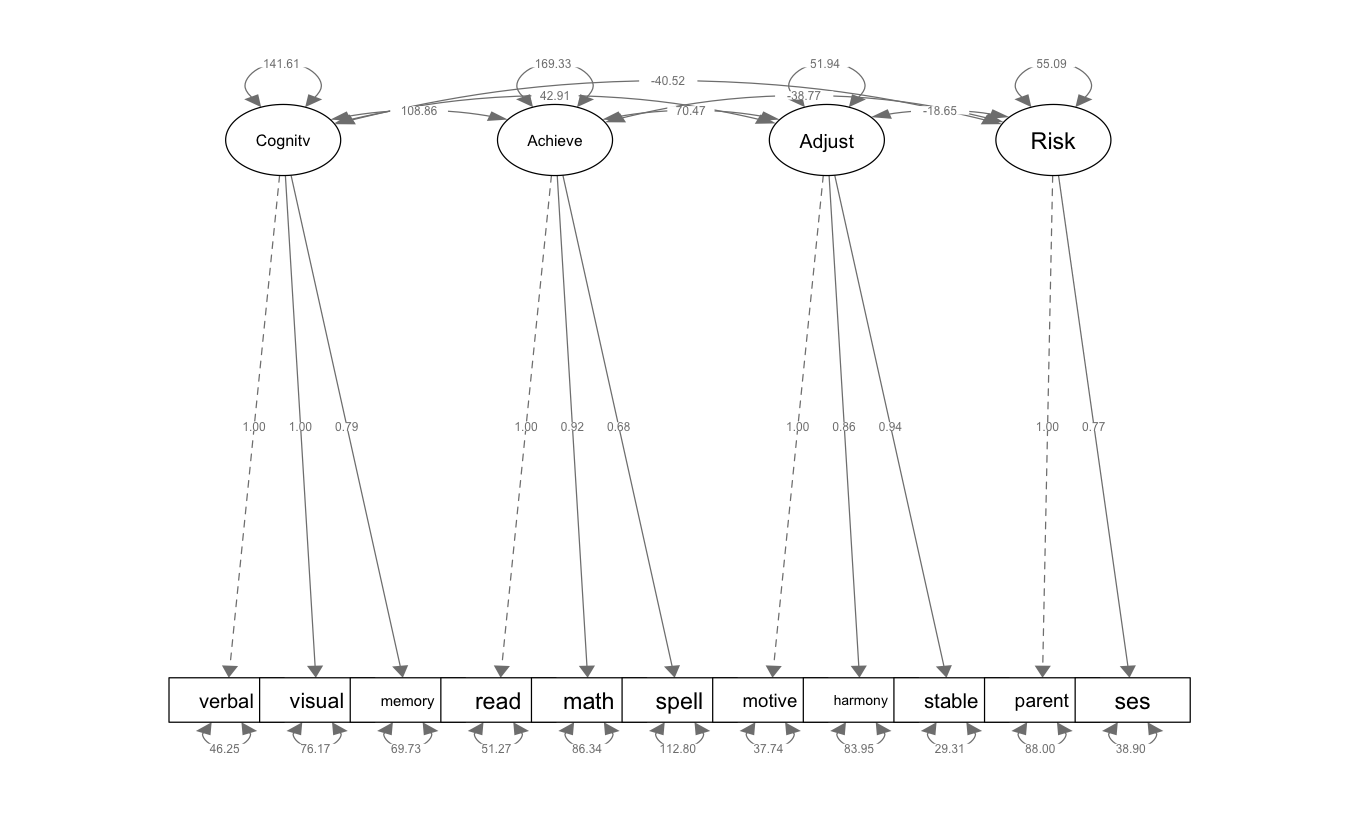

In [5]:
semPlot::semPaths(worlandCFA,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [6]:
fitMeasures(worlandCFA, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |> print()

 chisq     df    cfi    tli  rmsea   srmr 
16.212 38.000  1.000  1.049  0.000  0.023 


In [7]:
# predicted correlation matrix for factors
lavaan::lavInspect(worlandCFA, "cor.lv") |> print()

          Cogntv Achiev Adjust   Risk
Cognitive  1.000                     
Achieve    0.703  1.000              
Adjust     0.500  0.751  1.000       
Risk      -0.459 -0.401 -0.349  1.000


In [8]:
lavaan::residuals(worlandCFA, type = "standardized.mplus") |> print()

$type
[1] "standardized.mplus"

$cov
        verbal visual memory   read   math  spell motive harmny stable parent
verbal   0.000                                                               
visual   0.000  0.000                                                        
memory   0.123 -0.130  0.000                                                 
read     0.598  0.113 -0.285  0.000                                          
math     0.505  0.038 -0.377  0.597  0.000                                   
spell   -0.952 -0.255 -0.704 -0.667 -0.206  0.000                            
motive  -0.821 -0.157  0.310 -0.042 -0.078  1.484  0.000                     
harmony  0.117 -0.453  0.171  0.942 -1.179  1.196 -1.010  0.000              
stable   0.285  0.112  0.566 -1.893 -0.467  0.942  0.422  0.436  0.000       
parent  -0.092 -0.260 -0.157  0.234  0.379  0.157  0.301  0.020 -0.022  0.000
ses      1.890 -0.247 -1.417 -0.370 -0.114 -0.112  0.213 -0.125 -0.362  0.000
           ses
verbal      

In [9]:
lavaan::residuals(worlandCFA, type = "cor.bollen") |> print()

$type
[1] "cor.bollen"

$cov
        verbal visual memory   read   math  spell motive harmny stable parent
verbal   0.000                                                               
visual   0.000  0.000                                                        
memory   0.001 -0.002  0.000                                                 
read     0.015  0.003 -0.010  0.000                                          
math     0.017  0.001 -0.016  0.007  0.000                                   
spell   -0.040 -0.012 -0.035 -0.010 -0.006  0.000                            
motive  -0.031 -0.007  0.016 -0.001 -0.003  0.075  0.000                     
harmony  0.006 -0.026  0.010  0.041 -0.053  0.071 -0.027  0.000              
stable   0.011  0.005  0.028 -0.034 -0.015  0.045  0.005  0.012  0.000       
parent  -0.003 -0.010 -0.007  0.008  0.017  0.009  0.015  0.001 -0.001  0.000
ses      0.050 -0.010 -0.068 -0.012 -0.005 -0.006  0.010 -0.008 -0.016  0.000
           ses
verbal        
visua

In [10]:
# calculate factor reliability coefficients (semTools)
semTools::reliability(worlandCFA) |> print()

       Cognitive   Achieve    Adjust      Risk
alpha  0.8463118 0.8087788 0.7249416 0.5675488
omega  0.8513712 0.8207835 0.7296141 0.5770344
omega2 0.8513712 0.8207835 0.7296141 0.5770344
omega3 0.8515872 0.8227890 0.7327431 0.5770344
avevar 0.6588592 0.6101369 0.4744677 0.4094519


**Secondo Passaggio nella modellazione in due fasi per un modello SR completo di rendimento scolastico e adattamento in classe**

I risultati del Passaggio 1 del metodo in due fasi, che si concentrava sul modello di misurazione, consentono di procedere all'analisi del modello SR originale, che prevede cinque percorsi nella {numref}`kline-15-3-fig`, nel Passaggio 2 del metodo. Anche questa seconda analisi ha portato a una soluzione ammissibile. 

In [11]:
# step 2a
# 4-factor SR model with 5 paths among factors

# by default, lavaan frees the disturbance covariance
# between a pair of outcomes in a structural model
# when there is no direct effect between them
# thus, this parameter is explicitly fixed to zero
# in this analysis

worlandSRa_model <- "
    # measurement part
    Cognitive =~ verbal + visual + memory
    Achieve =~ read + math + spell
    Adjust =~ motive + harmony + stable
    Risk =~ parent + ses
    # structural part (5 paths)
    Achieve ~ Cognitive + Risk
    Adjust ~ Cognitive + Risk
    # constrain disturbance covariance to zero
    Adjust ~~ 0*Achieve 
"

In [12]:
worlandSRa <- lavaan::sem(worlandSRa_model,
    sample.cov = worland.cov,
    sample.nobs = 158
)

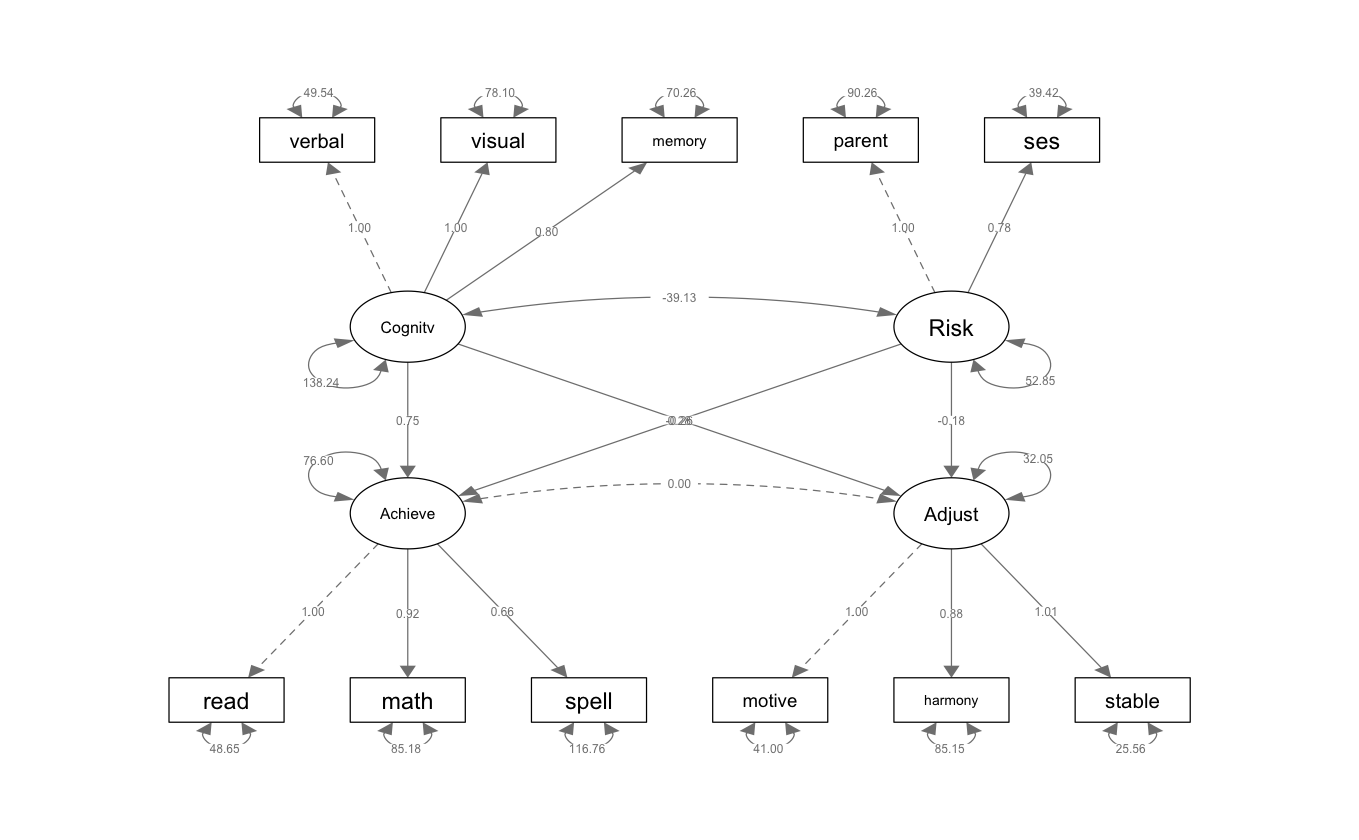

In [13]:
semPlot::semPaths(worlandSRa,
    what = "col", whatLabels = "par", style = "mx",
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [14]:
fitMeasures(worlandSRa, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |> print()

 chisq     df    cfi    tli  rmsea   srmr 
49.747 39.000  0.983  0.976  0.042  0.074 


In [15]:
lavaan::residuals(worlandSRa, type = "standardized.mplus") |> print()

$type
[1] "standardized.mplus"

$cov
        verbal visual memory   read   math  spell motive harmny stable parent
verbal   0.135                                                               
visual   0.892  0.122                                                        
memory   0.670  0.193  0.098                                                 
read    -0.270 -0.710 -1.047  0.009                                          
math    -0.004 -0.498 -0.910 -0.340     NA                                   
spell   -1.008 -0.332 -0.808  0.034  0.202  0.030                            
motive  -1.540 -0.721 -0.155  3.466  3.022  3.348  0.034                     
harmony -0.289 -0.858 -0.173  2.903  1.340  2.579 -0.244  0.057              
stable  -1.412 -1.235 -0.441  2.917  2.763  2.910  0.169  0.092  0.050       
parent  -0.309 -0.394 -0.260  0.960  0.849  0.340  0.625  0.244  0.702     NA
ses      1.413 -0.337 -1.439  0.567  0.478  0.135  0.653  0.157  0.546  1.467
           ses
verbal      

In [16]:
lavaan::residuals(worlandSRa, type = "cor.bollen") |> print()

$type
[1] "cor.bollen"

$cov
        verbal visual memory   read   math  spell motive harmny stable parent
verbal   0.000                                                               
visual   0.013  0.000                                                        
memory   0.011  0.004  0.000                                                 
read    -0.006 -0.019 -0.032  0.000                                          
math     0.000 -0.017 -0.034 -0.002  0.000                                   
spell   -0.042 -0.016 -0.040  0.000  0.005  0.000                            
motive  -0.054 -0.031 -0.008  0.219  0.197  0.242  0.000                     
harmony -0.015 -0.048 -0.010  0.199  0.090  0.192 -0.007  0.000              
stable  -0.041 -0.045 -0.019  0.170  0.171  0.201  0.001  0.002  0.000       
parent  -0.011 -0.017 -0.013  0.031  0.037  0.020  0.031  0.015  0.029  0.000
ses      0.044 -0.014 -0.071  0.016  0.020  0.008  0.030  0.010  0.020  0.012
           ses
verbal        
visua

Sebbene gli indici di fit siano buoni, l'adattamento locale del modello con cinque percorsi tra i fattori è scarso. Ad esempio, i residui standardizzati per diverse coppie di indicatori dei fattori di rendimento e adattamento hanno spesso un valore maggiore di 2: 

- Lettura, Motivazione, 3.466 
- Ortografia, Motivazione,  3.348 
- Lettura, Armonia, 2.903

Basandosi su tutti questi risultati relativi all'adattamento globale e locale, il modello SR iniziale nella {numref}`kline-15-3-fig` con cinque percorsi tra i fattori è rifiutato. 

Esaminiamo i *modification indices*.

In [17]:
modificationIndices(worlandSRa, sort = TRUE, minimum.value = 5)

,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
126,Adjust,~,Achieve,31.938548,0.4553494,0.8558291,0.8558291,0.8558291
16,Achieve,~~,Adjust,31.938547,34.8789498,0.7039273,0.7039273,0.7039273
125,Achieve,~,Adjust,31.938539,1.0882050,0.5789865,0.5789865,0.5789865
44,Achieve,=~,motive,5.438535,0.1491767,1.9561758,0.2065710,0.2065710
54,Adjust,=~,spell,5.240735,0.3894844,2.7174077,0.1968289,0.1968289
52,Adjust,=~,read,5.038370,0.3467951,2.4195674,0.1629036,0.1629036


I risultati dei *modification indices* mostrano che l'assenza di un percorso tra i fattori di rendimento e adattamento nella {numref}`kline-15-3-fig` è chiaramente incoerente con i dati. Per aggiungere una covariazione tra i fattori di rendimento e adattamento abbiamo due opzioni: o aggiungere un effetto diretto tra i fattori o permettere alle loro perturbazioni di covariare. Ma sarebbe difficile giustificare un effetto diretto rispetto all'altro: scarse abilità scolastiche potrebbero peggiorare l'adattamento in classe tanto quanto i problemi comportamentali a scuola potrebbero influire negativamente sul rendimento. La specificazione di una causalità reciproca tra 
Rendimento e Adattamento renderebbe il modello strutturale non ricorsivo, ma il modello non sarebbe identificato senza imporre vincoli irrealistici. Riformuliamo dunque il modello della {numref}`kline-15-3-fig` permettendo alle perturbazioni tra i fattori di rendimento e adattamento di covariare. 

In [18]:
# step 2b
# 4-factor SR model with 6 paths among factors
# this model is equivalent to the basic 4-factor
# CFA measurement model analyzed in step 1

worlandSRb_model <- "
    # measurement part
    Cognitive =~ verbal + visual + memory
    Achieve =~ read + math + spell
    Adjust =~ motive + harmony + stable
    Risk =~ parent + ses
    # structural part (6 paths)
    Achieve ~ Cognitive + Risk
    Adjust ~ Cognitive + Risk
    Adjust ~~ Achieve 
"

In [19]:
worlandSRb <- lavaan::sem(worlandSRb_model,
    sample.cov = worland.cov,
    sample.nobs = 158
)

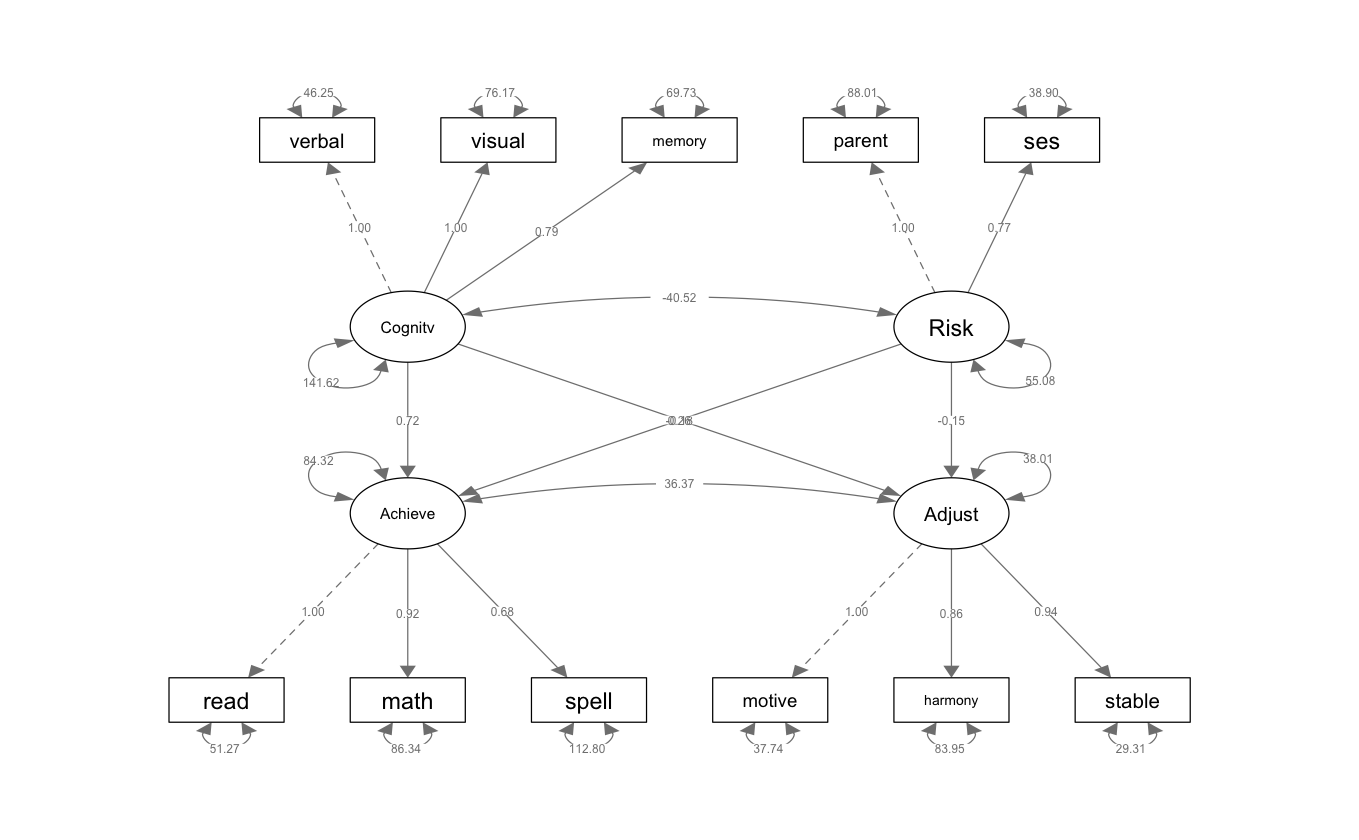

In [20]:
semPlot::semPaths(worlandSRb,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [21]:
parameterEstimates(worlandSRb) |> print()

         lhs op       rhs     est     se      z pvalue ci.lower ci.upper
1  Cognitive =~    verbal   1.000  0.000     NA     NA    1.000    1.000
2  Cognitive =~    visual   1.000  0.090 11.144  0.000    0.824    1.175
3  Cognitive =~    memory   0.788  0.077 10.217  0.000    0.637    0.940
4    Achieve =~      read   1.000  0.000     NA     NA    1.000    1.000
5    Achieve =~      math   0.925  0.083 11.100  0.000    0.761    1.088
6    Achieve =~     spell   0.678  0.080  8.480  0.000    0.521    0.835
7     Adjust =~    motive   1.000  0.000     NA     NA    1.000    1.000
8     Adjust =~   harmony   0.861  0.136  6.311  0.000    0.593    1.128
9     Adjust =~    stable   0.940  0.114  8.231  0.000    0.716    1.164
10      Risk =~    parent   1.000  0.000     NA     NA    1.000    1.000
11      Risk =~       ses   0.773  0.224  3.445  0.001    0.333    1.212
12   Achieve  ~ Cognitive   0.719  0.109  6.574  0.000    0.504    0.933
13   Achieve  ~      Risk  -0.175  0.190 -0.922  0.

In [22]:
fitMeasures(worlandSRb, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |> print()

 chisq     df    cfi    tli  rmsea   srmr 
16.212 38.000  1.000  1.049  0.000  0.023 


In [23]:
# predicted correlation matrix for factors
lavaan::lavInspect(worlandSRb, "cor.lv") |> print()

          Cogntv Achiev Adjust   Risk
Cognitive  1.000                     
Achieve    0.703  1.000              
Adjust     0.500  0.751  1.000       
Risk      -0.459 -0.401 -0.349  1.000


In [24]:
lavaan::residuals(worlandSRb, type = "standardized.mplus") |> print()

$type
[1] "standardized.mplus"

$cov
        verbal visual memory   read   math  spell motive harmny stable parent
verbal      NA                                                               
visual  -0.002     NA                                                        
memory   0.122 -0.131     NA                                                 
read     0.597  0.113 -0.285     NA                                          
math     0.504  0.038 -0.377  0.597     NA                                   
spell   -0.952 -0.255 -0.704 -0.667 -0.206     NA                            
motive  -0.821 -0.157  0.309 -0.042 -0.078  1.484     NA                     
harmony  0.117 -0.453  0.171  0.942 -1.179  1.196 -1.010     NA              
stable   0.284  0.112  0.566 -1.893 -0.467  0.942  0.422  0.436     NA       
parent  -0.093 -0.261 -0.157  0.234  0.378  0.157  0.300  0.019 -0.022  0.034
ses      1.891 -0.247 -1.417 -0.370 -0.114 -0.112  0.213 -0.125 -0.362  0.043
           ses
verbal      

In [25]:
lavaan::residuals(worlandSRb, type = "cor.bollen") |> print()

$type
[1] "cor.bollen"

$cov
        verbal visual memory   read   math  spell motive harmny stable parent
verbal   0.000                                                               
visual   0.000  0.000                                                        
memory   0.001 -0.002  0.000                                                 
read     0.015  0.003 -0.010  0.000                                          
math     0.017  0.001 -0.016  0.007  0.000                                   
spell   -0.040 -0.012 -0.036 -0.010 -0.006  0.000                            
motive  -0.031 -0.007  0.016 -0.001 -0.003  0.075  0.000                     
harmony  0.006 -0.026  0.010  0.041 -0.053  0.071 -0.027  0.000              
stable   0.011  0.005  0.028 -0.034 -0.015  0.045  0.005  0.012  0.000       
parent  -0.003 -0.011 -0.007  0.008  0.017  0.009  0.015  0.001 -0.001  0.000
ses      0.050 -0.010 -0.068 -0.012 -0.005 -0.006  0.010 -0.008 -0.016  0.000
           ses
verbal        
visua

Confrontiamo i due modelli con il test del rapporto di verosimiglianza.

In [26]:
lavTestLRT(worlandSRa, worlandSRb)

,Df,AIC,BIC,Chisq,Chisq diff,RMSEA,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
worlandSRb,38,12938.16,13023.92,16.21231,NA,NA,NA,NA
worlandSRa,39,12969.70,13052.39,49.74654,33.53423,0.4537762,1,7.002091e-09


L'adattamento del modello SR con 5 percorsi tra i fattori è significativamente peggiore rispetto a quello del modello CFA con 6 percorsi. Gli indici di fit del modello con 6 percorsi sono buoni così come il suo adattamento locale.

In [27]:
# standardized estimates with standard errors
lavaan::standardizedSolution(worlandSRb) |> print()

         lhs op       rhs est.std    se      z pvalue ci.lower ci.upper
1  Cognitive =~    verbal   0.868 0.032 27.075  0.000    0.805    0.931
2  Cognitive =~    visual   0.806 0.037 21.720  0.000    0.733    0.879
3  Cognitive =~    memory   0.747 0.043 17.470  0.000    0.663    0.831
4    Achieve =~      read   0.876 0.031 28.212  0.000    0.815    0.937
5    Achieve =~      math   0.791 0.038 20.777  0.000    0.717    0.866
6    Achieve =~     spell   0.639 0.053 11.984  0.000    0.534    0.743
7     Adjust =~    motive   0.761 0.049 15.552  0.000    0.665    0.857
8     Adjust =~   harmony   0.561 0.065  8.657  0.000    0.434    0.688
9     Adjust =~    stable   0.781 0.048 16.381  0.000    0.688    0.875
10      Risk =~    parent   0.620 0.100  6.217  0.000    0.425    0.816
11      Risk =~       ses   0.677 0.104  6.495  0.000    0.473    0.881
12   Achieve  ~ Cognitive   0.657 0.079  8.357  0.000    0.503    0.811
13   Achieve  ~      Risk  -0.100 0.107 -0.935  0.350   -0.310  

La correlazione stimata tra i fattori esogeni abilità cognitiva e rischio, –.459, è sensata: è negativa (più alto il rischio, minore l'abilità cognitiva). Questa correlazione non è prossima a -1.0, il che suggerisce che i due fattori sono distinti e non quasi identici, confermando così l'ipotesi di validità discriminante.

Analizzando gli impatti specifici, un incremento di un punto nel fattore cognitivo (misurato come varianza comune del ragionamento verbale) prevede un aumento di .719 punti nel rendimento scolastico (misurato come varianza comune dell'abilità di lettura), tenendo conto del fattore di rischio. In termini standardizzati, un aumento di una deviazione standard nell'abilità cognitiva si traduce in un aumento di .657 deviazioni standard nel rendimento scolastico, sempre controllando per il rischio.

L'influenza del rischio sul rendimento scolastico è meno marcata: un incremento di un punto nel rischio (misurato come varianza comune del disturbo genitoriale) prevede una diminuzione di .175 punti nel rendimento scolastico. Standardizzando, un aumento di una deviazione standard nel rischio si associa a una diminuzione di .100 deviazioni standard nel rendimento, controllando per l'abilità cognitiva.

La correlazione di perturbazione di .643 misura la relazione tra il rendimento scolastico e l'adattamento in classe, dopo aver escluso l'influenza di altri fattori noti, in questo caso l'abilità cognitiva e il rischio di psicopatologia. In termini più semplici, la correlazione di perturbazione ci dice quanto sono correlati il rendimento scolastico e l'adattamento in classe quando si tiene conto (o si "controlla") dell'effetto dell'abilità cognitiva e del rischio. Un valore di .643 indica una correlazione moderatamente forte, suggerendo che quando il rendimento scolastico di uno studente migliora (o peggiora), anche il suo adattamento in classe tende a migliorare (o peggiorare) in modo simile, indipendentemente dal suo livello di abilità cognitiva o dal grado di rischio di psicopatologia.

La presenza di questa correlazione parziale sostanziale implica che ci sono fattori non misurati nel modello che influenzano sia il rendimento scolastico sia l'adattamento in classe. Questi fattori non misurati potrebbero includere variabili come il sostegno familiare, la qualità dell'insegnamento, fattori ambientali o personalità dello studente. Importante è che questi fattori non misurati sono distinti sia dall'abilità cognitiva dello studente sia dal suo rischio di psicopatologia. In conclusione, il valore di .643 non solo mette in luce l'interdipendenza tra rendimento scolastico e adattamento in classe, ma suggerisce anche l'esistenza di altre variabili influenti che non sono state direttamente misurate o incluse nel modello. Questa informazione può essere preziosa per indirizzare ulteriori ricerche o interventi educativi.

## Strategie Avanzate di Modellazione per i Modelli di Regressione Strutturale

Oltre all'approccio tradizionale di modellazione in due fasi, esiste un metodo più complesso a quattro fasi per analizzare i modelli SR completi. Questa strategia, introdotta da Mulaik e Millsap nel 2000, amplia la modellazione bifase aggiungendo ulteriori analisi esplorative che possono portare a conclusioni più definitive in una serie più estesa di studi. Questo metodo prevede che ogni fattore comune abbia almeno quattro indicatori, numero ritenuto sufficiente per testare l'unidimensionalità con il test dell'annullamento della tetrade. I quattro indicatori rappresentano anche il numero minimo perché un modello CFA a singolo fattore sia considerato sovraidentificato. Il ricercatore testa quindi una serie di almeno quattro modelli gerarchicamente correlati, seguendo questi passaggi:

1. **Primo Passaggio**: Il modello iniziale meno restrittivo è un modello EFA, dove ogni indicatore satura su tutti i fattori. Il numero di fattori è lo stesso dei modelli analizzati nei passaggi successivi. Questo modello viene analizzato con lo stesso metodo di stima utilizzato nei passaggi successivi, ad esempio il metodo ML per indicatori continui e normalmente distribuiti. Alternativamente, si possono usare tecniche come ESEM o E/CFA al posto dell'EFA. Questo passaggio serve a testare la correttezza provvisoria delle ipotesi riguardo al numero di fattori.

2. **Secondo Passaggio**: Corrisponde al Primo Passaggio della modellazione bifase. Qui, si specifica un modello CFA con alcuni carichi incrociati fissati a zero, identificando gli indicatori che non dipendono da certi fattori comuni. Se l'adattamento del modello CFA è ragionevole, si può procedere al test del modello SR; in caso contrario, il modello di misurazione va rivisto.

3. **Terzo Passaggio**: Si specifica il modello SR target con lo stesso schema di carichi incrociati fissati a zero del modello CFA del Secondo Passaggio. Tipicamente, la parte strutturale del modello SR include meno effetti diretti rispetto al totale delle covarianze tra fattori nel modello CFA. Se la parte strutturale del modello SR ha tanti percorsi quanti il modello CFA, i due modelli saranno equivalenti e questo passaggio può essere omesso.

4. **Quarto Passaggio**: Coinvolge test su ipotesi specifiche sui parametri definiti dall'inizio del processo. Questi test possono comportare l'applicazione di vincoli zero o altri, aumentando di uno dfM. I Passaggi 3 e 4 della modellazione a quattro fasi rappresentano una precisazione delle attività generali del Secondo Passaggio della modellazione bifase.

Una delle critiche alla modellazione a quattro fasi riguarda la necessità di avere almeno quattro indicatori per fattore, condizione non sempre pratica o desiderabile, specialmente quando pochi indicatori, o anche un singolo indicatore ottimale, presentano migliori caratteristiche psicometriche rispetto a quattro. Tuttavia, Mulaik e Millsap hanno osservato che avere almeno quattro indicatori può compensare, in parte, le limitazioni di un campione più piccolo incrementando dfM.

Entrambi gli approcci, bifase e quattro fasi, sfruttano la variazione casuale quando i modelli vengono testati e riformulati utilizzando gli stessi dati, e sono considerati migliori della modellazione monofase, dove non esiste una distinzione tra questioni di misurazione e struttura. 